In [1]:
import datetime
print(f'Notebook last run (end-to-end): {datetime.datetime.now()}')

Notebook last run (end-to-end): 2023-08-07 20:35:40.097251


In [2]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-b2cf200d-48ee-dfde-a086-8a247a48556e)


In [3]:
# Get and Import series of helper functions for the notebook
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2023-08-07 20:35:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-07 20:35:41 (91.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2023-08-07 20:35:45--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 209.85.145.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.008s  

2023-08-07 20:35:45 (70.8 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
# Turn .csv into pandas dataframe's
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [6]:
train_df.tail(10)

,id,keyword,location,text,target
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1
7605,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1
7607,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [7]:
test_df.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [8]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
#How many samples total?
print(f'training samples: {len(train_df)}')
print(f'testing samples: {len(test_df)}')
print(f'total samples: {len(train_df) + len(test_df)}')

training samples: 7613
testing samples: 3263
total samples: 10876


In [10]:
# shuffle training df
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head(10)

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
5559,7934,rainstorm,NaN,@Calum5SOS you look like you got caught in a r...,0
1765,2538,collision,NaN,my favorite lady came to our volunteer meeting...,1
1817,2611,crashed,NaN,@brianroemmele UX fail of EMV - people want to...,1
6810,9756,tragedy,"Los Angeles, CA",Can't find my ariana grande shirt this is a f...,0
4398,6254,hijacking,"Athens,Greece",The Murderous Story Of AmericaÛªs First Hijac...,1


In [11]:
# let's visualize some of random data
import random
random_index = random.randint(0, len(train_df)-5) #create random indexes not higher than the total number of samples
for row in train_df_shuffled[['text', 'target']][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f'Target: {target}', '(real disaster)' if target > 0 else "(not real disaster)")
  print(f'Text:\n{text}\n')
  print('--------\n')

Target: 1 (real disaster)
Text:
#deai #??? #??? #??? Suicide bomber kills 15 in Saudi security site mosque - Reuters  http://t.co/SqydkslFzp

--------

Target: 0 (not real disaster)
Text:
I tell my cousins I don't wanna hang out and they text me saying 'we're coming over' honestly do you have a death wish

--------

Target: 1 (real disaster)
Text:
9) 'Without the bombing you would have to do hara-kiri you know commit suicide'. http://t.co/UO0aQk9KR8 Hiroshima 70 years ago.

--------

Target: 1 (real disaster)
Text:
Sydney hostage crisis has now been recovered from the AirAsia wreckage.

--------

Target: 0 (not real disaster)
Text:
Parental experience may help coral offspring survive climate change: Preconditioning adult corals to increased... http://t.co/N9c3i9v8gO

--------



In [12]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(
    train_df_shuffled['text'].to_numpy(),
    train_df_shuffled['target'].to_numpy(),
    test_size=0.1,
    random_state=42
)

In [13]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [14]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [16]:
text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None,
                                    output_mode='int',
                                    output_sequence_length=None)

In [17]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [18]:
# create another textvectorization object using our custom params
max_vocab_length = 10000
max_length=15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [19]:
sample_sentence = "this is tushar"
text_vectorizer([sample_sentence])

FailedPreconditionError: ignored

In [20]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [21]:
sample_sentence = "this is tushar"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=array([[19,  9,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])>

In [22]:
sample_sentence2 = 'tushar is my name'
text_vectorizer([sample_sentence2])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  1,   9,  13, 735,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [23]:
# choose random sentence from dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f'Orginal text:\n{random_sentence}\n\nVectorize version:')
text_vectorizer([random_sentence])

Orginal text:
Lily Xo is a sexy cowgirl out in the sticks http://t.co/qew4c5M1xd View and download video

Vectorize version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1, 6597,    9,    3, 3430,    1,   36,    4,    2, 4535, 1840,
         976,    7, 1142,   72]])>

In [24]:
#get unique word in the vocabulary
words_in_vocab=text_vectorizer.get_vocabulary()
top_5_words=words_in_vocab[:5] # top 5
bottom_5_words=words_in_vocab[-5:]
print(f'Total number of words in the vocabulary: {len(words_in_vocab)}\n')
print(f'Top 5 common words: {top_5_words}')
print(f'bootom 5 least common words: {bottom_5_words}')


Total number of words in the vocabulary: 10000

Top 5 common words: ['', '[UNK]', 'the', 'a', 'in']
bootom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [25]:
words_in_vocab.ndim

AttributeError: ignored

In [26]:
words_in_vocab

['',
 '[UNK]',
 'the',
 'a',
 'in',
 'to',
 'of',
 'and',
 'i',
 'is',
 'for',
 'on',
 'you',
 'my',
 'with',
 'it',
 'that',
 'at',
 'by',
 'this',
 'from',
 'be',
 'are',
 'was',
 'have',
 'like',
 'as',
 'up',
 'so',
 'just',
 'but',
 'me',
 'im',
 'your',
 'not',
 'amp',
 'out',
 'its',
 'will',
 'an',
 'no',
 'has',
 'fire',
 'after',
 'all',
 'when',
 'we',
 'if',
 'now',
 'via',
 'new',
 'more',
 'get',
 'or',
 'about',
 'what',
 'he',
 'people',
 'news',
 'been',
 'over',
 'one',
 'how',
 'dont',
 'they',
 'who',
 'into',
 'were',
 'do',
 'us',
 '2',
 'can',
 'video',
 'emergency',
 'there',
 'disaster',
 'than',
 'police',
 'would',
 'his',
 'still',
 'her',
 'some',
 'body',
 'storm',
 'crash',
 'burning',
 'suicide',
 'back',
 'man',
 'california',
 'why',
 'time',
 'them',
 'had',
 'buildings',
 'rt',
 'first',
 'cant',
 'see',
 'got',
 'day',
 'off',
 'our',
 'going',
 'nuclear',
 'know',
 'world',
 'bomb',
 'fires',
 'love',
 'killed',
 'go',
 'attack',
 'youtube',
 'dead

In [27]:
# Embedding
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                              output_dim=128,
                              embeddings_initializer='uniform',
                              input_length=max_length,
                              name='embedding1')
embedding


In [28]:
random_sentence

'Lily Xo is a sexy cowgirl out in the sticks http://t.co/qew4c5M1xd View and download video'

In [40]:
sample_embadded = embedding(text_vectorizer([random_sentence]))
sample_embadded # shape=(1, 15, 128), 1 stands for 1 sequence data, 15 for max_length=15 and 128 stands for dims of each token

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.01155863, -0.0198032 , -0.04975192, ..., -0.01594851,
          0.04483285, -0.01067733],
        [-0.0248153 , -0.04460678, -0.01045727, ...,  0.04510167,
          0.04194787, -0.01958921],
        [-0.04826502, -0.03754448, -0.01542104, ..., -0.02409028,
         -0.04979626,  0.03360477],
        ...,
        [ 0.01088524, -0.01655765, -0.04404224, ..., -0.01826032,
          0.04195352, -0.04098523],
        [ 0.02810433,  0.02520153, -0.00062646, ...,  0.02445091,
         -0.01913823, -0.04889616],
        [-0.01721828,  0.02707529,  0.0132144 , ...,  0.03654622,
         -0.03173989,  0.04775146]]], dtype=float32)>

In [41]:
sample_embadded[0][14]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.01721828,  0.02707529,  0.0132144 , -0.00465641,  0.03914632,
       -0.01900806, -0.01461936,  0.03370453, -0.01477234,  0.03857202,
        0.04958183, -0.03745904,  0.02225432,  0.02791274,  0.03730908,
        0.02570182, -0.0325644 ,  0.01754827, -0.04167906,  0.012799  ,
       -0.02718019, -0.04575186, -0.04576956, -0.03633921, -0.0243592 ,
       -0.00628371, -0.0111405 , -0.03052542, -0.04903971,  0.02012524,
        0.00516409,  0.02754966,  0.03325645,  0.01764578,  0.04544133,
       -0.01834504, -0.04802803,  0.04142531,  0.0422848 , -0.01572236,
       -0.0471148 , -0.00328998, -0.02432526, -0.03143487,  0.03546754,
       -0.01093429,  0.01690061,  0.01019274, -0.03588926,  0.04465203,
        0.01758475,  0.03372156,  0.03800323,  0.02594734, -0.00592817,
        0.03414401,  0.02368906,  0.01344303,  0.04200797,  0.00560058,
        0.04574711,  0.03225776, -0.03340522,  0.00269799, -0.0417764 ,
       -0.011864

Model 0: Naive Bayes (baseline)



In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


In [43]:
#Create tokenization and modeling pipeline
model_0 = Pipeline([
    ('tf-idf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

#fit the model
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [44]:
#let's evaluate the model
baseline_score = model_0.score(val_sentences, val_labels)
baseline_score

0.7926509186351706

In [48]:
print(f'Accuracy: {baseline_score * 100:.2f}%')

Accuracy: 79.27%


In [49]:
baseline_pred=model_0.predict(val_sentences)
baseline_pred[-20:]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [53]:
#evaluation
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  '''
  It's calculates model accuracy, precision, recall and f1 score

  Args:
  -----
  y_true: truth labels
  y_pred: predicted labels

  it returns output as a dictionary.

  '''
  #calculate accuracy
  model_accuracy = accuracy_score(y_true, y_pred)*100
  #precision, recall, f1 score
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results


In [52]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_pred)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

Model_1: Feed Forward Neural Net.

In [54]:
#  Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

#Create directory to save tensorboard logs
SAVE_DIR = 'model_logs'

In [58]:
#Build model with the Functional API without pooling
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype='string' )
x = text_vectorizer(inputs)
x = embedding(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_1')


In [57]:
train_sentences.shape, train_df.shape, train_sentences.ndim

((6851,), (7613, 5), 1)

In [61]:
model_1.summary() # Embedding params = 128 * 10000 here dims = 128 and max_vocab_length = 10000


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding1 (Embedding)      (None, 15, 128)           1280000   
                                                                 
 dense (Dense)               (None, 15, 1)             129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [60]:
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [64]:
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='FFNN_without_pooling')])

Saving TensorBoard log files to: model_logs/FFNN_without_pooling/20230807-231417


ValueError: ignored

In [65]:
#Build model using functional API with pooling
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,), dtype='string')
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.GlobalAveragePooling1D()(x) # lower the dimentionality of the embedding
outputs=layers.Dense(1, activation='sigmoid')(x)
model_1=tf.keras.Model(inputs, outputs, name='model_1')


In [66]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding1 (Embedding)      (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-tra

In [67]:
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [68]:
model_1_history = model_1.fit(train_sentences,\
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230807-232818
Epoch 1/5
215/215 [==============================] - 22s 69ms/step - loss: 0.6097 - accuracy: 0.6936 - val_loss: 0.5363 - val_accuracy: 0.7559
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4416 - accuracy: 0.8183 - val_loss: 0.4693 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3469 - accuracy: 0.8608 - val_loss: 0.4593 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2853 - accuracy: 0.8923 - val_loss: 0.4644 - val_accuracy: 0.7900
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2384 - accuracy: 0.9126 - val_loss: 0.4769 - val_accuracy: 0.7861


<Axes: >

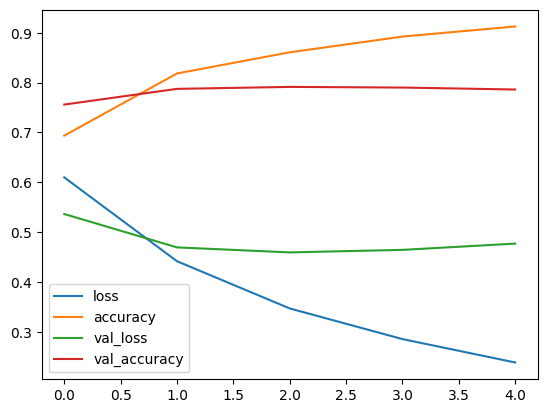

In [69]:
import pandas as pd
pd.DataFrame(model_1_history.history).plot()

In [71]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 7ms/step - loss: 0.4769 - accuracy: 0.7861


[0.4769173860549927, 0.7860892415046692]

In [73]:
embedding.weights

[<tf.Variable 'embedding1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 0.01120632, -0.0193859 , -0.0349717 , ...,  0.00731993,
          0.05112077, -0.03090765],
        [ 0.01702154, -0.02492968, -0.05285178, ..., -0.01447534,
          0.04789878, -0.00957184],
        [ 0.0504538 , -0.04436547,  0.01564065, ...,  0.01277773,
         -0.03016243,  0.0088511 ],
        ...,
        [-0.00327266,  0.03293257, -0.01663268, ..., -0.04512107,
          0.04855735, -0.0189196 ],
        [-0.00842997, -0.08051143, -0.02450794, ...,  0.08357274,
          0.06210273,  0.09011599],
        [ 0.03637738, -0.03789658, -0.06957287, ...,  0.02166557,
          0.05826594,  0.05790246]], dtype=float32)>]

In [74]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.40740114],
       [0.7457471 ],
       [0.99779344],
       [0.10893565],
       [0.10836054],
       [0.93824476],
       [0.91114056],
       [0.9927891 ],
       [0.9686384 ],
       [0.2697746 ]], dtype=float32)

In [75]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [76]:
model_1_result = calculate_results(val_labels, model_1_preds)
model_1_result

{'accuracy': 78.60892388451444,
 'precision': 0.7903277546022673,
 'recall': 0.7860892388451444,
 'f1': 0.7832971347503846}